<a href="https://colab.research.google.com/github/DilshanBotheju/CSACP_Project/blob/main/HomicidePatternRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import folium
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import networkx as nx

In [41]:
#Load relevant datasets
homicide_data_path = "/content/drive/MyDrive/DSGP/datasets/database.csv"
homicide_data = pd.read_csv(homicide_data_path, encoding = "latin-1")
homicide_data.head()

<ipython-input-41-acfac49e8cac>:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  homicide_data = pd.read_csv(homicide_data_path, encoding = "latin-1")


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [42]:
# Identifying shape of the original dataset
homicide_data.shape

(638454, 24)

In [43]:
# Getting a sample percentage of data to preprocess
sample_percentage = 0.5
homicide_data = homicide_data.sample(frac=sample_percentage, random_state=42)

In [44]:
# Identifying shape of sample dataset
homicide_data.shape

(319227, 24)

In [45]:
# Analyisng crime dataset
homicide_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319227 entries, 484984 to 190407
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              319227 non-null  int64 
 1   Agency Code            319227 non-null  object
 2   Agency Name            319227 non-null  object
 3   Agency Type            319227 non-null  object
 4   City                   319227 non-null  object
 5   State                  319227 non-null  object
 6   Year                   319227 non-null  int64 
 7   Month                  319227 non-null  object
 8   Incident               319227 non-null  int64 
 9   Crime Type             319227 non-null  object
 10  Crime Solved           319227 non-null  object
 11  Victim Sex             319227 non-null  object
 12  Victim Age             319227 non-null  int64 
 13  Victim Race            319227 non-null  object
 14  Victim Ethnicity       319227 non-null  object
 15  

In [46]:
# Finding duplicates in dataset
homicide_data.duplicated().sum()

0

In [47]:
# Replacing unknown with NA to identify null columns
homicide_data.replace("Unknown", np.nan, inplace=True)

In [48]:
# Identifying null value count
homicide_data.isnull().sum()

,0
Record ID,0
Agency Code,0
Agency Name,26
Agency Type,0
City,0
State,0
Year,0
Month,0
Incident,0
Crime Type,0


In [49]:
homicide_data.head(20)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
484984,484985,CA03612,Victorville,Municipal Police,San Bernardino,California,2005,July,1,Murder or Manslaughter,...,Hispanic,NaN,0,NaN,NaN,NaN,Handgun,1,0,FBI
608445,608446,TX10100,Harris County,Sheriff,Harris,Texas,2013,May,3,Murder or Manslaughter,...,Not Hispanic,NaN,0,NaN,NaN,NaN,Firearm,0,0,FBI
417612,417613,AR06200,St. Francis,Sheriff,St. Francis,Arkansas,2001,June,1,Murder or Manslaughter,...,Not Hispanic,Male,18,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI
372692,372693,AZ01003,Tucson,Municipal Police,Pima,Arizona,1998,March,6,Murder or Manslaughter,...,Not Hispanic,NaN,0,NaN,NaN,NaN,Handgun,0,0,FBI
402028,402029,WA02400,Okanogan,Sheriff,Okanogan,Washington,1999,August,1,Murder or Manslaughter,...,NaN,Male,20,White,NaN,Girlfriend,Rifle,0,0,FBI
541091,541092,MI40502,Kalkaska,Municipal Police,Kalkaska,Michigan,2008,August,1,Murder or Manslaughter,...,NaN,Male,25,White,NaN,NaN,Blunt Object,0,2,FBI
432591,432592,WA03200,Spokane,Sheriff,Spokane,Washington,2001,March,1,Murder or Manslaughter,...,NaN,NaN,0,NaN,NaN,NaN,Handgun,0,0,FBI
489735,489736,MDBPD00,Baltimore,Municipal Police,Baltimore city,Maryland,2005,January,13,Murder or Manslaughter,...,NaN,NaN,0,NaN,NaN,NaN,Handgun,0,0,FBI
630057,630058,LA02800,Lafayette County,Sheriff,Lafayette,Louisiana,2014,February,1,Murder or Manslaughter,...,Not Hispanic,Male,15,Black,Not Hispanic,Husband,Firearm,0,0,FBI
558145,558146,NC03606,Gastonia,Municipal Police,Gaston,North Carolina,2009,April,1,Murder or Manslaughter,...,Not Hispanic,Male,21,Black,Not Hispanic,Stranger,Handgun,0,1,FBI


In [50]:
# Drop columns with higher null values
homicide_data = homicide_data.drop(["Perpetrator Ethnicity"],axis = 1,errors="ignore")

In [51]:
homicide_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319227 entries, 484984 to 190407
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Record ID          319227 non-null  int64 
 1   Agency Code        319227 non-null  object
 2   Agency Name        319201 non-null  object
 3   Agency Type        319227 non-null  object
 4   City               319227 non-null  object
 5   State              319227 non-null  object
 6   Year               319227 non-null  int64 
 7   Month              319227 non-null  object
 8   Incident           319227 non-null  int64 
 9   Crime Type         319227 non-null  object
 10  Crime Solved       319227 non-null  object
 11  Victim Sex         318730 non-null  object
 12  Victim Age         319227 non-null  int64 
 13  Victim Race        315981 non-null  object
 14  Victim Ethnicity   134954 non-null  object
 15  Perpetrator Sex    224098 non-null  object
 16  Perpetrator Age    3

In [52]:
# Handling categorical null values using mode
for column in homicide_data.columns:
    if homicide_data[column].dtype == "object":
        homicide_data[column].fillna(homicide_data[column].mode()[0], inplace=True)

<ipython-input-52-83883757957c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  homicide_data[column].fillna(homicide_data[column].mode()[0], inplace=True)


In [53]:
# Handling numerical null values using median
for column in homicide_data.columns:
    if homicide_data[column].dtype != "object":
        homicide_data[column].fillna(homicide_data[column].median(), inplace=True)

<ipython-input-53-a13c21e4658e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  homicide_data[column].fillna(homicide_data[column].median(), inplace=True)


In [54]:
# Checking null count
homicide_data.isnull().sum()

,0
Record ID,0
Agency Code,0
Agency Name,0
Agency Type,0
City,0
State,0
Year,0
Month,0
Incident,0
Crime Type,0


In [55]:
# Viewing updated data
homicide_data.head(10)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
484984,484985,CA03612,Victorville,Municipal Police,San Bernardino,California,2005,July,1,Murder or Manslaughter,...,White,Hispanic,Male,0,White,Acquaintance,Handgun,1,0,FBI
608445,608446,TX10100,Harris County,Sheriff,Harris,Texas,2013,May,3,Murder or Manslaughter,...,White,Not Hispanic,Male,0,White,Acquaintance,Firearm,0,0,FBI
417612,417613,AR06200,St. Francis,Sheriff,St. Francis,Arkansas,2001,June,1,Murder or Manslaughter,...,Black,Not Hispanic,Male,18,Black,Acquaintance,Handgun,0,0,FBI
372692,372693,AZ01003,Tucson,Municipal Police,Pima,Arizona,1998,March,6,Murder or Manslaughter,...,White,Not Hispanic,Male,0,White,Acquaintance,Handgun,0,0,FBI
402028,402029,WA02400,Okanogan,Sheriff,Okanogan,Washington,1999,August,1,Murder or Manslaughter,...,White,Not Hispanic,Male,20,White,Girlfriend,Rifle,0,0,FBI
541091,541092,MI40502,Kalkaska,Municipal Police,Kalkaska,Michigan,2008,August,1,Murder or Manslaughter,...,White,Not Hispanic,Male,25,White,Acquaintance,Blunt Object,0,2,FBI
432591,432592,WA03200,Spokane,Sheriff,Spokane,Washington,2001,March,1,Murder or Manslaughter,...,White,Not Hispanic,Male,0,White,Acquaintance,Handgun,0,0,FBI
489735,489736,MDBPD00,Baltimore,Municipal Police,Baltimore city,Maryland,2005,January,13,Murder or Manslaughter,...,Black,Not Hispanic,Male,0,White,Acquaintance,Handgun,0,0,FBI
630057,630058,LA02800,Lafayette County,Sheriff,Lafayette,Louisiana,2014,February,1,Murder or Manslaughter,...,White,Not Hispanic,Male,15,Black,Husband,Firearm,0,0,FBI
558145,558146,NC03606,Gastonia,Municipal Police,Gaston,North Carolina,2009,April,1,Murder or Manslaughter,...,Black,Not Hispanic,Male,21,Black,Stranger,Handgun,0,1,FBI


<ipython-input-56-a1b11b47cb02>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=homicide_data, y="Perpetrator Age Group", order=homicide_data["Perpetrator Age Group"].value_counts().index, palette="viridis")


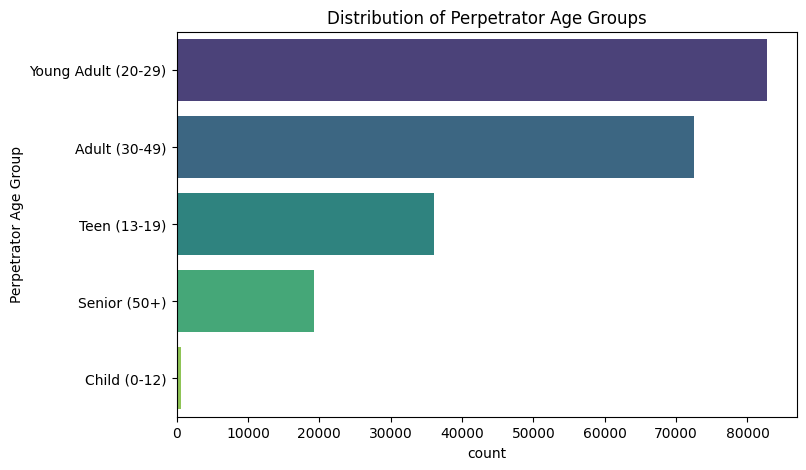

In [56]:
# Converting Perpetrator age to numeric
homicide_data["Perpetrator Age"] = pd.to_numeric(homicide_data["Perpetrator Age"], errors="coerce")

# Define age bins and labels
age_bins = [0, 12, 19, 29, 49, 100]
age_labels = ["Child (0-12)", "Teen (13-19)", "Young Adult (20-29)", "Adult (30-49)", "Senior (50+)"]

# Create new column with age categories
homicide_data["Perpetrator Age Group"] = pd.cut(homicide_data["Perpetrator Age"], bins=age_bins, labels=age_labels, right=True)

# Display the distribution of age groups
plt.figure(figsize=(8, 5))
sns.countplot(data=homicide_data, y="Perpetrator Age Group", order=homicide_data["Perpetrator Age Group"].value_counts().index, palette="viridis")
plt.title("Distribution of Perpetrator Age Groups")
plt.show()


In [57]:
# Convert Month to datetime format
homicide_data["Month"] = pd.to_datetime(homicide_data["Month"], format="%B", errors="coerce").dt.month

In [58]:
homicide_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319227 entries, 484984 to 190407
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Record ID              319227 non-null  int64   
 1   Agency Code            319227 non-null  object  
 2   Agency Name            319227 non-null  object  
 3   Agency Type            319227 non-null  object  
 4   City                   319227 non-null  object  
 5   State                  319227 non-null  object  
 6   Year                   319227 non-null  int64   
 7   Month                  319227 non-null  int32   
 8   Incident               319227 non-null  int64   
 9   Crime Type             319227 non-null  object  
 10  Crime Solved           319227 non-null  object  
 11  Victim Sex             319227 non-null  object  
 12  Victim Age             319227 non-null  int64   
 13  Victim Race            319227 non-null  object  
 14  Victim Ethnicity    

EDA (Exploratory Data Analysis)

<ipython-input-59-372c2f28047c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=homicide_data, y="Crime Type", order=homicide_data["Crime Type"].value_counts().index, palette="coolwarm")


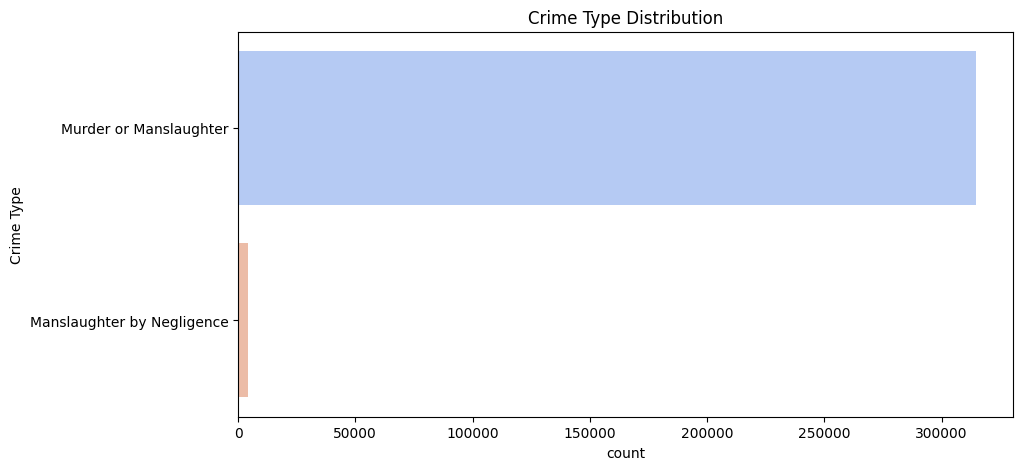

In [59]:
# Distribution of homicide crime types
plt.figure(figsize=(10,5))
sns.countplot(data=homicide_data, y="Crime Type", order=homicide_data["Crime Type"].value_counts().index, palette="coolwarm")
plt.title("Crime Type Distribution")
plt.show()

<ipython-input-60-b69b9ed5197d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=homicide_data, y="Weapon", order=homicide_data["Weapon"].value_counts().head(10).index, palette="magma")


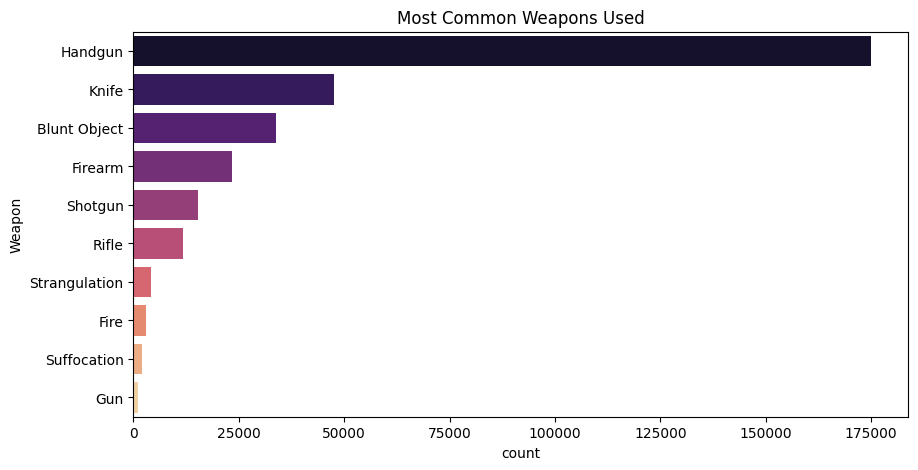

In [60]:
# Plotting most common weapons used
plt.figure(figsize=(10,5))
sns.countplot(data=homicide_data, y="Weapon", order=homicide_data["Weapon"].value_counts().head(10).index, palette="magma")
plt.title("Most Common Weapons Used")
plt.show()

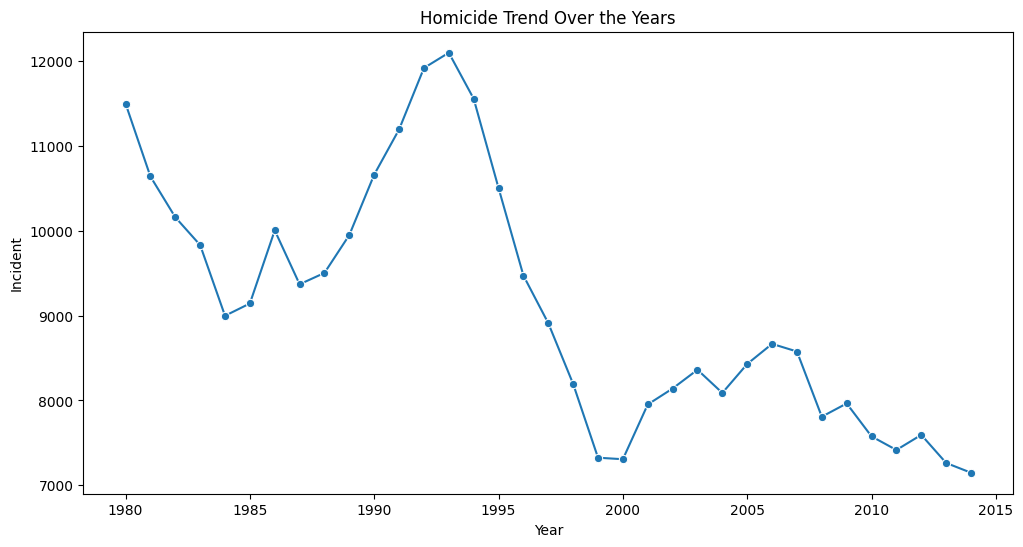

In [61]:
# Identify homicide trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Incident", data=homicide_data.groupby("Year")["Incident"].count().reset_index(), marker="o")
plt.title("Homicide Trend Over the Years")
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder


# Label encoding categorical features
categorical_cols = ["Agency Type", "City", "State", "Crime Type",
                    "Crime Solved", "Victim Sex", "Victim Race", "Victim Ethnicity",
                    "Perpetrator Sex", "Perpetrator Race", "Relationship", "Weapon","Perpetrator Age Group"]
encoder_dict = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    homicide_data[col] = encoder.fit_transform(homicide_data[col])
    encoder_dict[col] = encoder



In [ ]:
# Standard Scaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(homicide_data[features])

In [63]:
# Drop non-essential columns
homicide_data = homicide_data.drop(columns=["Record ID", "Incident", "Record Source","Agency Code","Agency Name","Agency Type","Crime Solved", ""],axis=1,errors="ignore")



In [64]:
# Viewing the data
homicide_data.head()

,City,State,Year,Month,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Perpetrator Age Group
484984,1364,4,2005,7,1,1,18,3,0,1,0,3,0,8,1,0,5
608445,689,43,2013,5,1,1,27,3,1,1,0,3,0,6,0,0,5
417612,1458,3,2001,6,1,1,42,1,1,1,18,1,0,8,0,0,3
372692,1224,2,1998,3,1,1,44,3,1,1,0,3,0,8,0,0,5
402028,1144,47,1999,8,1,0,15,3,1,1,20,3,14,11,0,0,4


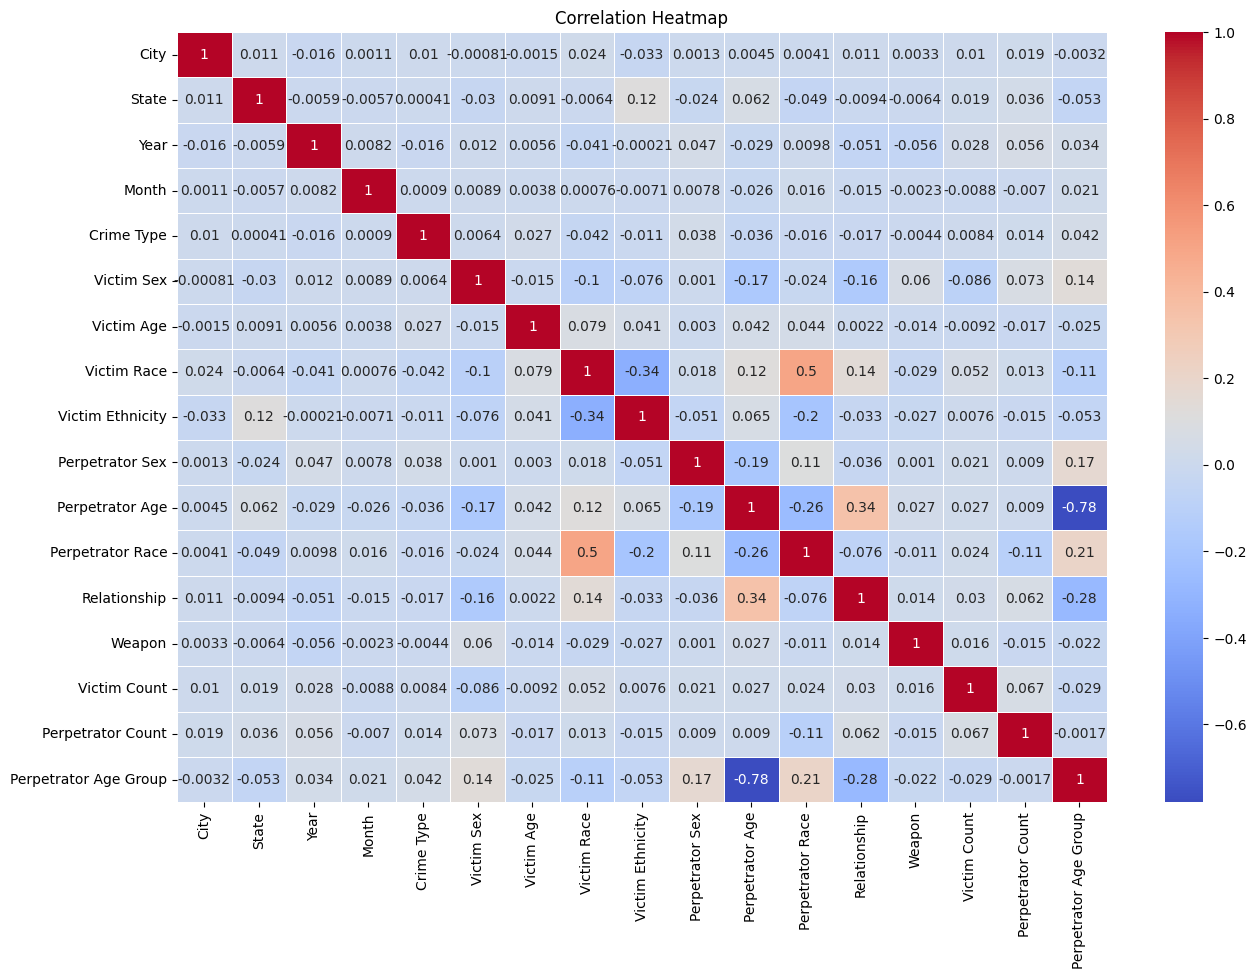

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Getting correlation matrix
correlation_matrix = homicide_data.corr()

# Plotting heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [66]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Train Nearest Neighbors model using Cosine Similarity
knn = NearestNeighbors(n_neighbors=5, metric="cosine")
knn.fit(homicide_data)

# Function to find similar cases
def find_similar_cases(case_index, top_n=5):
    if case_index >= len(homicide_data) or case_index < 0:
        print("Invalid case index!")
        return None

    # Getting vector for the selected case
    case_vector = homicide_data.iloc[case_index].values.reshape(1, -1)

    # Finding nearest neighbors
    distances, indices = knn.kneighbors(case_vector, n_neighbors=top_n+1)

    # Extract similar case indices
    similar_indices = indices[0][1:]

    # Convert distances to similarity scores
    similarity_scores = 1 - distances[0][1:]

    # Get similar cases from original dataset
    similar_cases = homicide_data.iloc[similar_indices].copy()
    similar_cases["Similarity Score"] = similarity_scores

    return similar_cases

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


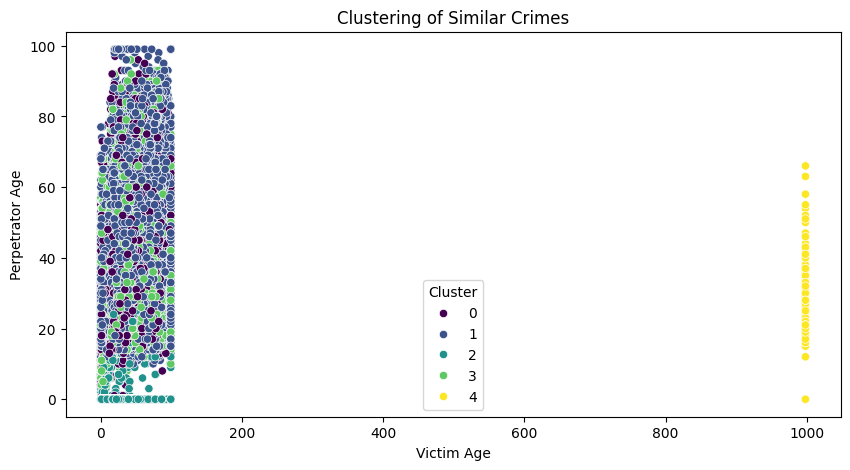

In [67]:
# Defining features
features = ["Victim Age", "Perpetrator Age Group", "Weapon", "Victim Race", "Perpetrator Race", "Perpetrator Count", "Relationship", "State", "Perpetrator Sex", "Month" ]



# Apply k-means clustering
num_clusters = 5

# Apply K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
homicide_data ["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualizing Clusters (using Perpetrator Age and Victim Age as an example)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Perpetrator Age"], y=df["Victim Age"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Perpetrator Age")
plt.ylabel("Victim Age")
plt.title("Clusters of Similar Homicides")
plt.legend(title="Cluster")
plt.show()

# Display some clustered crime records
df[["Victim Age", "Perpetrator Age", "Weapon", "Cluster"]].head(10)